In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

In [10]:
def load_mat_data(train_data_path, test_data_path):
    # 加载训练数据
    train_mat = scipy.io.loadmat(train_data_path)
    train_data = np.array(train_mat['train_data_5'], dtype='float32')
    train_labels = np.array(train_mat['train_label_5'], dtype='float32').squeeze()  # 从2D转换为1D
    
    # 加载测试数据
    test_mat = scipy.io.loadmat(test_data_path)
    test_data = np.array(test_mat['test_data_5'], dtype='float32')
    test_labels = np.array(test_mat['test_label_5'], dtype='float32').squeeze()  # 从2D转换为1D
    
    return train_data, train_labels, test_data, test_labels

# 设置数据路径
train_data_path = '/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/database/train_5.mat'
test_data_path = '/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/database/test_5.mat'

# 加载数据
train_data, train_labels, test_data, test_labels = load_mat_data(train_data_path, test_data_path)

# 因为1D CNN需要一个额外的维度，我们将数据重塑
train_data = train_data.reshape((-1, 3072, 1))
test_data = test_data.reshape((-1, 3072, 1))

# 对数据进行归一化处理
train_data /= np.max(train_data)
test_data /= np.max(test_data)



In [12]:
from tensorflow.keras.regularizers import l2
model = models.Sequential([
    layers.Reshape((32, 96, 1), input_shape=(3072,)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels),
                    callbacks=[callback])


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - accuracy: 0.4388 - loss: 1.6376 - val_accuracy: 0.1990 - val_loss: 12.3073
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.6289 - loss: 0.9895 - val_accuracy: 0.5460 - val_loss: 1.7393
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - accuracy: 0.6855 - loss: 0.8053 - val_accuracy: 0.5045 - val_loss: 1.2844
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.7202 - loss: 0.6983 - val_accuracy: 0.6580 - val_loss: 1.0201
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.7474 - loss: 0.6207 - val_accuracy: 0.4610 - val_loss: 2.3019
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.7411 - loss: 0.6548 - val_accuracy: 0.5280 - val_loss: 1.3229
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.7465 - loss: 0.6103 - val_accuracy: 0.6575 - val_loss: 0.7867
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.7570 - loss: 0.5998 -

In [14]:
# 在测试集上评估模型
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


63/63 - 1s - 13ms/step - accuracy: 0.5010 - loss: 2.1827

Test accuracy: 0.5009999871253967


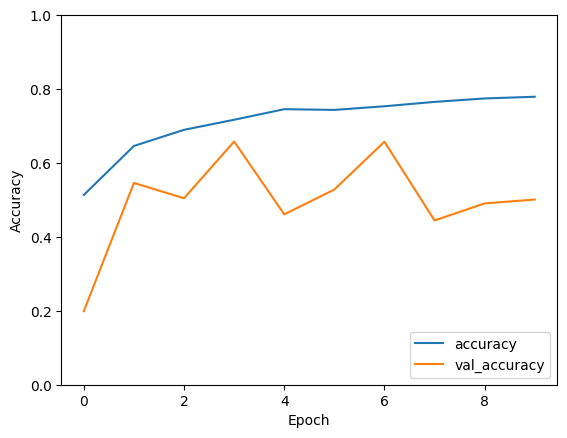

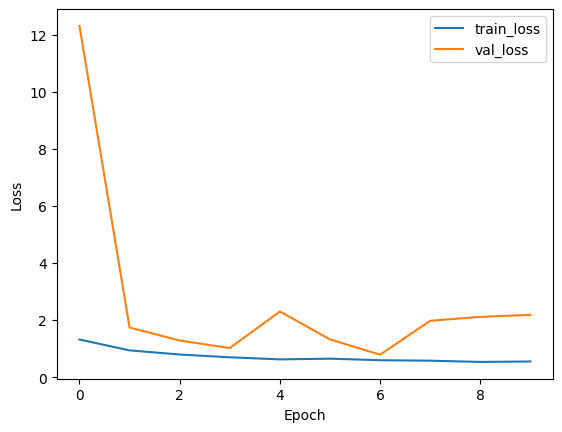

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 预测测试数据集
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])  # 假设有10个类别
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'model' is not defined